In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
import os
os.listdir()


['Untitled.ipynb', 'data.csv']

In [9]:
import pandas as pd

df = pd.read_csv("data.csv")

df.head()


<ipython-input-9-1ade327b6dd8>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [10]:
r = 102303473

ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

print("ar =", ar)
print("br =", br)


ar = 0.30000000000000004
br = 1.2


In [11]:
x = df['no2'].dropna().values

print("Total samples:", len(x))
x[:10]


Total samples: 419509


array([17.4,  7. , 28.5, 14.7,  7.5, 25.7, 17.1,  8.7, 23. ,  8.9])

In [12]:
z = x + ar * np.sin(br * x)

z[:10]


array([17.66886265,  7.25637967, 28.60498541, 14.41936226,  7.62363555,
       25.53661637, 17.39851178,  8.4451207 , 23.18731314,  8.61481451])

In [13]:
mu = np.mean(z)
sigma = np.std(z)

lambda_para = 1 / (2 * sigma**2)
c = 1 / (sigma * np.sqrt(2 * np.pi))

print("mu =", mu)
print("sigma =", sigma)
print("lambda =", lambda_para)
print("c =", c)


mu = 25.803054141411398
sigma = 18.50932629463293
lambda = 0.0014594485227794724
c = 0.02155358191060213


In [14]:
p_z = c * np.exp(-lambda_para * (z - mu)**2)

p_z[:10]


array([0.0195696 , 0.01304653, 0.02130803, 0.01783949, 0.01330589,
       0.02155135, 0.01944232, 0.01388506, 0.02133943, 0.01400436])

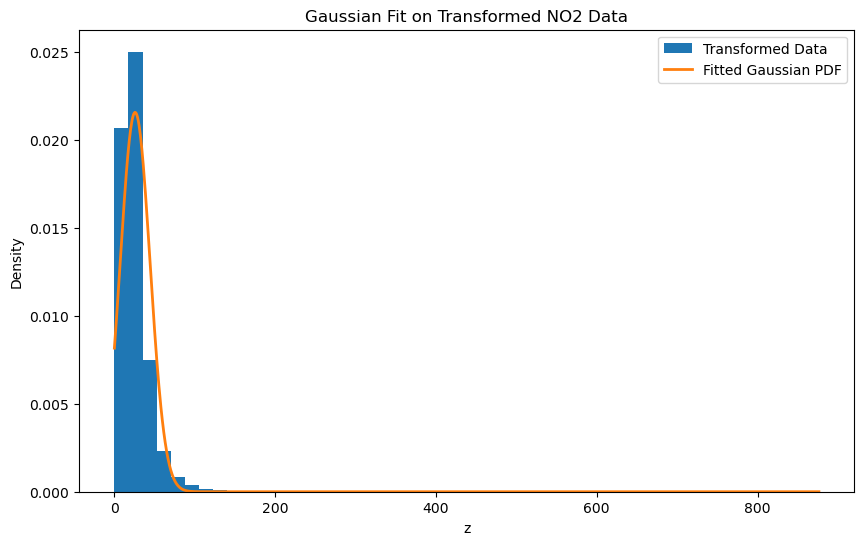

In [15]:
plt.figure(figsize=(10,6))

# Histogram
plt.hist(z, bins=50, density=True, label='Transformed Data')

# PDF curve
x_range = np.linspace(z.min(), z.max(), 1000)
y = c * np.exp(-lambda_para * (x_range - mu)**2)

plt.plot(x_range, y, linewidth=2, label='Fitted Gaussian PDF')

plt.title("Gaussian Fit on Transformed NO2 Data")
plt.xlabel("z")
plt.ylabel("Density")

plt.legend()
plt.show()
